
---

# Análise exploratória de dados com SQL: Análise de Crédito
Dataset disponível no Github do professor André Perez: [credito](https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/credito.csv)<br>
Meu projeto no Github: [Projeto no github](https://github.com/DevBrunoP/Projeto-Credit-SQL/tree/main) <br>
Autor: Bruno Pereira<br>

---

## 1\. Contexto

O objetivo desse projeto é fazermos a análise exploratória de dados utilizando a base de dados de cartão de crédito dos clientes de um banco, disponibilizado pelo professor André Perez em aula. Essa análise será feita utilizando a linguagem SQL e o Ambiente AWS: **S3** e **Athena**. Cada análise feita terá também o código SQL que foi utilizado para gerar tal consulta. Após a criação de um bucket no S3, todas as análises serão feitas utilizando o Athena.

Vamos analisar o que cada coluna representa:

- **idade:** Idade do cliente;
- **sexo:** Sexo do cliente (F ou M);
- **dependentes:** Número de dependentes do cliente;
- **escolaridade:** Nível de escolaridade do cliente;
- **estado_civil:** Estado civil do cliente;
- **salario_anual:** Faixa salarial do cliente;
- **tipo_cartao:** Tipo de cartao do cliente;
- **qtd_produtos:** Quantidade de produtos comprados nos últimos 12 meses;
- **iteracoes_12m:** Quantidade de iterações/transacoes nos ultimos 12 meses;
- **meses_inativo_12m:** Quantidade de meses que o cliente ficou inativo;
- **limite_credito:** Limite de credito do cliente;
- **valor_transacoes_12m:** Valor das transações dos ultimos 12 meses;
- **qtd_transacoes_12m:** Quantidade de transacoes dos ultimos 12 meses.

## 2\. Wrangling

Nesta fase utilizarei o Python apenas para excluir algumas colunas pois não farei o uso de todas, além do mais como o serviço do AWS existe a cobrança tomei essa precusão.

**Importando a base de dados**

In [28]:
import pandas as pd # Importando a biblioteca pandas e definindo um apelido

df = pd.read_csv('credito_bruto.csv') # Importando a base de dados e atribuindo a uma variável

**Fazendo a exclusão das colunas que não iremos utilizar**

In [29]:
df.drop(columns=['id', 'default', 'meses_de_relacionamento'], inplace=True)

**Pré processamento em duas colunas para o valor monetário ficar no padrão americano**

In [30]:
# Remover separadores de milhar e trocar vírgula por ponto
df['limite_credito'] = df['limite_credito'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

# Remover separadores de milhar e trocar vírgula por ponto
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

**Exportando o resultado final no formato CSV**

In [31]:
df.to_csv("credito_tratado.csv", index=False, header=None) # Exportando o resultado sem o cabeçalho

## 3\. Exploração inicial dos dados

**Analisando a quantidade de linhas do nosso Dataset**

```SQL
SELECT COUNT(*) as Contagem_linhas 
FROM credito;
```

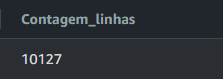

**Descrição dos tipos de dado da planilha**

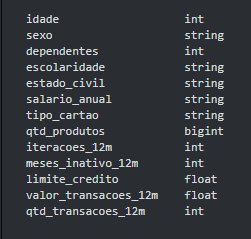

**Conclusão:** Podemos notar a existência de 5 atributos(Colunas) categóricas e 8 atributos numéricos

**Analisando as primeiras linhas do nosso Dataset**

```SQL
SELECT * FROM credito LIMIT 5;
```

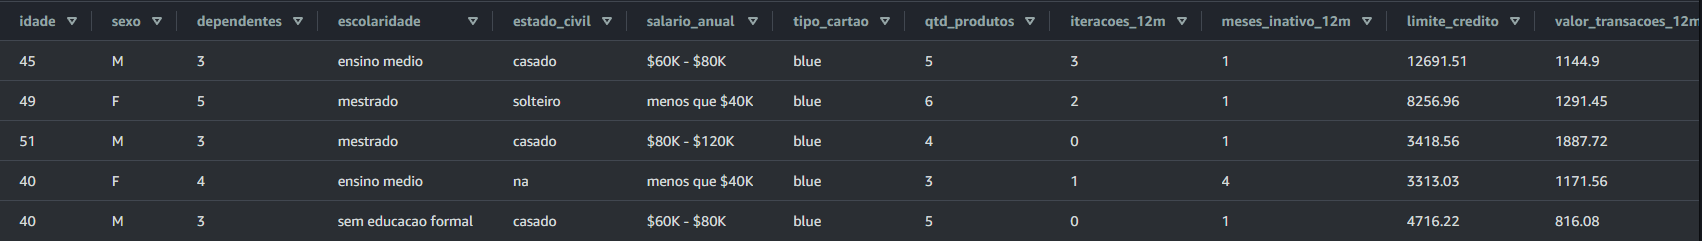

**Vamos analisar agora as colunas categóricas do nosso Dataset**

```SQL
SELECT DISTINCT escolaridade FROM credito;
```

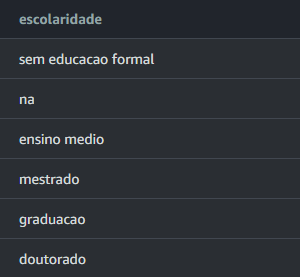

```SQL
SELECT DISTINCT estado_civil FROM credito;
```

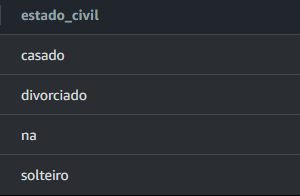

```SQL
SELECT DISTINCT salario_anual FROM credito;
```

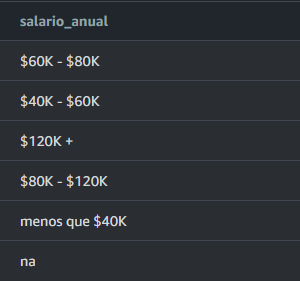

```SQL
SELECT DISTINCT tipo_cartao FROM credito;
```

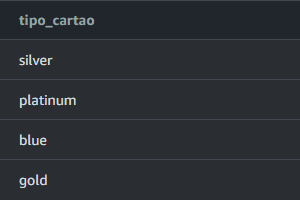

```SQL
SELECT DISTINCT sexo FROM credito;
```

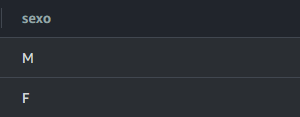

**Conclusão:** Podemos observar que a maioria dos nosso atributos existem valores NA(not available), ou seja valores vazios, em nossas análises precisaremos adicionar uma cláusula WHERE para conseguir contornar esse furos em nosso DataSet.

**Analisaremos agora como as categorias desses atributos categóricos estão distribuídos**

```SQL
SELECT 
	COUNT(*) AS Frequencia, 
    	escolaridade 
FROM 
	credito 
GROUP BY 
	escolaridade
ORDER BY 
	Frequencia DESC;
```

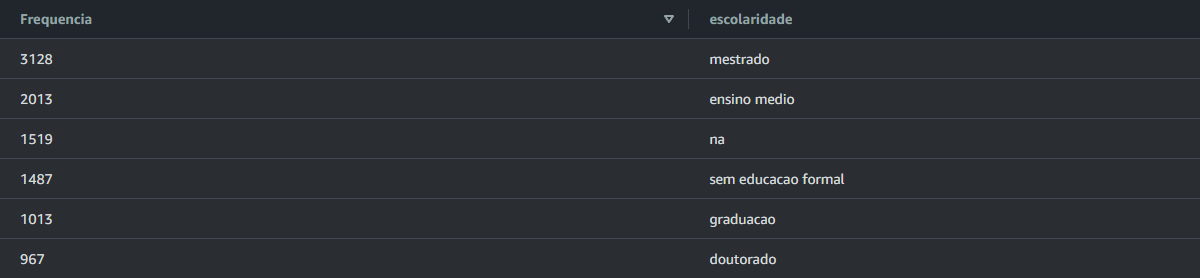

**Conclusão:** Cerca de 15% dos nossos dados nesta categoria estão vazios, o nível de escolaridade mestrado é nossa moda, com frequência de 30,88%. Curiosamente dutorado é a categoria menos frequente, por mestrado ser a escolaridade mais frequente talvez poderíamos presumir que o doutorado ocupasse uma parcela maior.

```SQL
SELECT 
	count(*) AS Frequencia, 
    	estado_civil 
FROM 
	credito 
GROUP BY 
	estado_civil
ORDER BY 
	Frequencia DESC;
```

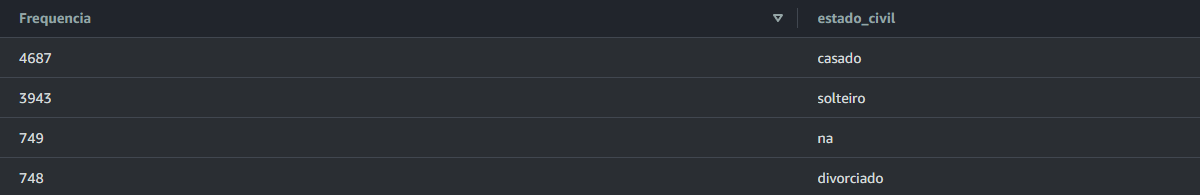

**Conclusão:** Pouco mais de 7% dos nossos dados estão vazios, a maior parecela de clientes da nossa base é do estado civíl casado, cerca de pouco mais de 46% da nossa amostra.

```SQL
SELECT 
	count(*) AS Frequencia, 
    	salario_anual 
FROM 
	credito 
GROUP BY 
	salario_anual
ORDER BY 
	Frequencia DESC;
```

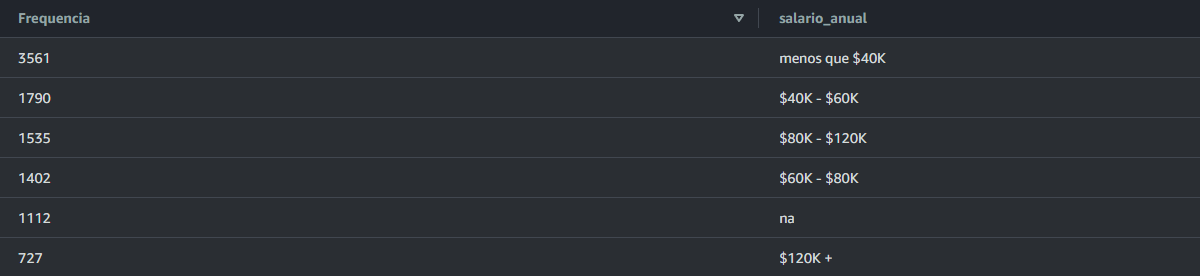

**Conclusão:** A maior parte dos clientes da nossa amostra ganham menos de 40 mil dólares anuais e uma parcela bem peguena(Cerca de 7%) ganham mais de 120 mil.

```SQL
SELECT 
	count(*) AS Frequencia, 
    	tipo_cartao 
FROM 
	credito 
GROUP BY 
	tipo_cartao
ORDER BY 
	Frequencia DESC;
```

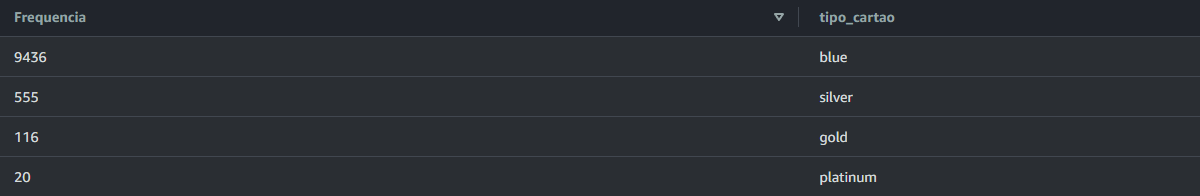

**Conclusão:** A nossa moda nessa categoria são os clientes com cartão blue, com uma maioria esmagadora de mais de 90%. Podemos observar também que não há valores vazios neste atributo.

```SQL
SELECT 
	count(*) AS Frequencia, 
    	sexo 
FROM 
	credito 
GROUP BY 
	sexo
ORDER BY 
	Frequencia DESC;
```

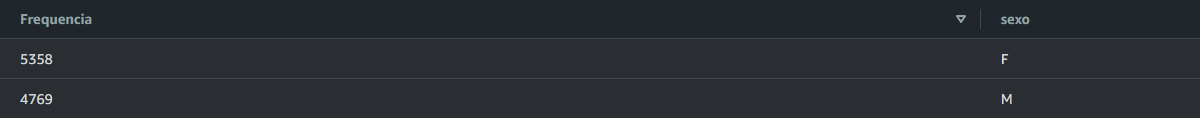

**Conclusão:** A quantidade de homens e mulheres estão bem distribuídas, também não há valores vazios nesse atributo.

### V. Vamos analisar agora os atributos numéricos, para isso usaremos algumas estimativas de localização para resumir todas as linhas em um único valor.

```SQL
SELECT
    AVG(idade) as Media_Idade,
    MAX(idade) AS Maior_Idade,
    MIN(idade) As Menor_Idade,
    STDDEV_SAMP(idade) AS Desvio_Padrao_Idade
FROM 
    credito;
```

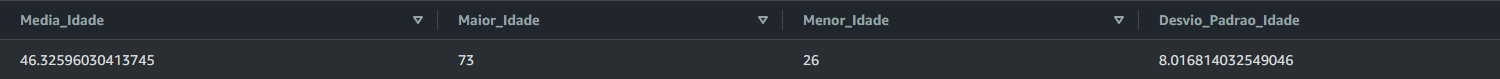

```SQL
SELECT
	AVG(dependentes) as Media_de_Dependentes,
	MAX(dependentes) AS Maior_Quantidade_Dependentes,
	MIN(dependentes) As Menor_Quantidade_Dependentes,
	STDDEV_SAMP(dependentes) AS Desvio_Padrao_Dependentes
FROM 
	credito;
```

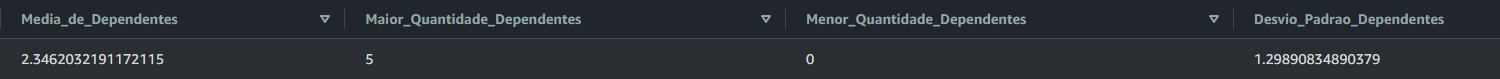

```SQL
SELECT
	AVG(qtd_produtos) as Media_qtd_produtos,
	MAX(qtd_produtos) AS Maior_qtd_produtos,
	MIN(qtd_produtos) As Menor_qtd_produtos,
	STDDEV_SAMP(qtd_produtos) AS Desvio_Padrao_Qtd_Produtos
FROM 
	credito;
```

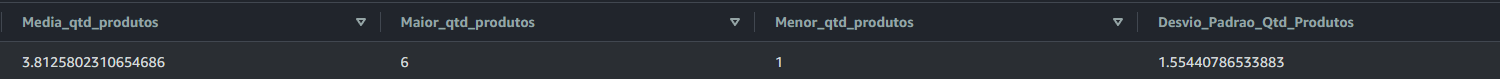

```SQL
SELECT
	AVG(iteracoes_12m) as Media_iteracoes_12m,
	MAX(iteracoes_12m) AS Maior_iteracoes_12m,
	MIN(iteracoes_12m) As Menor_iteracoes_12m,
	STDDEV_SAMP(iteracoes_12m) AS Desvio_Padrao_iteracoes_12m
FROM 
	credito;
```

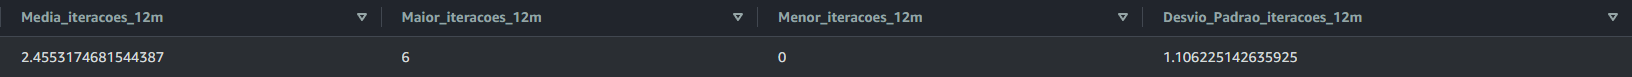

```SQL
SELECT
	AVG(meses_inativo_12m) as Media_meses_inativos,
	MAX(meses_inativo_12m) AS Maior_meses_inativos,
	MIN(meses_inativo_12m) As Menor_meses_inativos,
    STDDEV_SAMP(meses_inativo_12m) AS Desvio_Padrao_meses_inativos
FROM 
	credito;
```

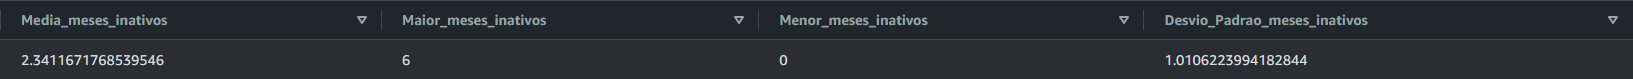

```SQL
SELECT
	AVG(qtd_transacoes_12m) as Media_Qtd_transacoes_em_12m,
	MAX(qtd_transacoes_12m) AS Maior_Qtd_transacoes_em_12m,
	MIN(qtd_transacoes_12m) As Menor_Qtd_transacoes_em_12m,
	STDDEV_SAMP(qtd_transacoes_12m) AS Desvio_Padrao_Qtd_transacoes_em_12m
FROM 
	credito;
```

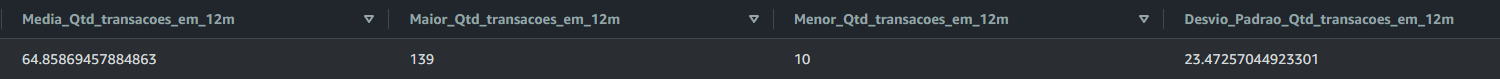

**Conclusão:** Podemos notar que os dados estão pouco dispersos ou seja, há pouca variabilidade dos dados, isso é comprovado pelo desvio padrão, que é a distância média entre cada dado e a média.

OBS: Tenho conhecimento que poderiam ser utilizados mais estimativas de localização além dessas como o desvio padrão, a mediana, etc. Porém como utilizei o SQLonline por algum motivo não existia essas duas função, por isso optei por usar apenas a média, o máximo e o mínimo.

## 4\. Análise exploratória de Dados

**Vamos entender se existe alguma informação relevante quando agrupamos a idade pelo sexo dos clientes**

```SQL
SELECT 
    AVG(idade) AS media_idade, 
    MIN(idade) AS min_idade, 
    MAX(idade) AS max_idade, 
    sexo 
FROM 
    credito
GROUP BY 
    sexo;
```

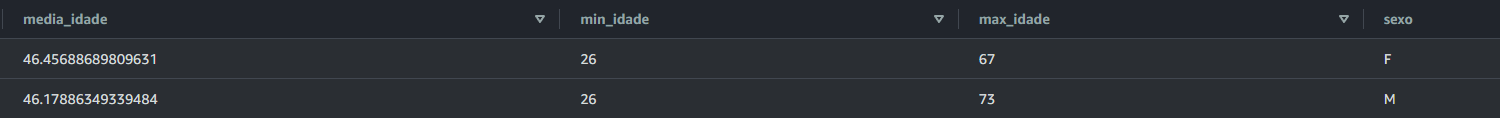

**Conclusão:** Através dessa análise não conseguimos extrair nenhuma informação relevante, as informações inclusive são bem semelhantes, apenas o máximo da idade por sexo que varia um pouco mais.

**Vamos analisar agora se podemos retirar algum insight analisando o limite do cartão pelo sexo**

```SQL
SELECT 
	AVG(limite_credito) AS media_limite_cartao, 
        MIN(limite_credito) AS min_limite_cartao, 
        MAX(limite_credito) AS max_limite_cartao, 
        COUNT(limite_credito) AS contagem,
        sexo 
FROM 
	credito
GROUP BY 
	sexo;
```

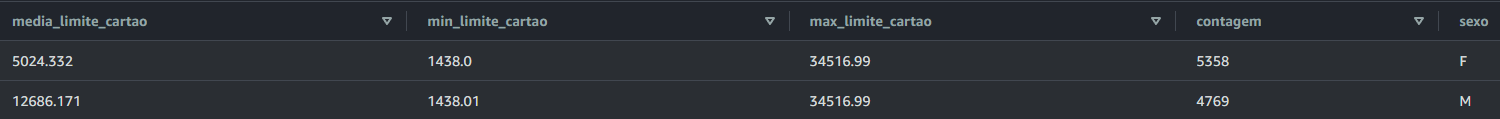

**Conslusão**: Podemos notar uma informação importante dessa análise que é a média do limite de crédito, o sexo feminino possui um limite muito inferior se compararmos com o sexo masculino, esse fenômeno não se deve pelas informações do sexo estarem desbalenceadas, pois se observamos o atributo contagem notamos que a frequência de clientes pelo sexo é bem próxima, inclusive a nossa amostra possui mais clientes com o sexo feminino, então o que se deve essa divergência no limite médio de crédito ser tão grande? Será devido a renda?

```SQL
SELECT 
	AVG(limite_credito) AS media_limite,
	sexo, 
	salario_anual 
FROM 
	credito 
WHERE 
	salario_anual != 'na' 
GROUP BY
	sexo, 
	salario_anual 
ORDER BY
	AVG(limite_credito) DESC
```

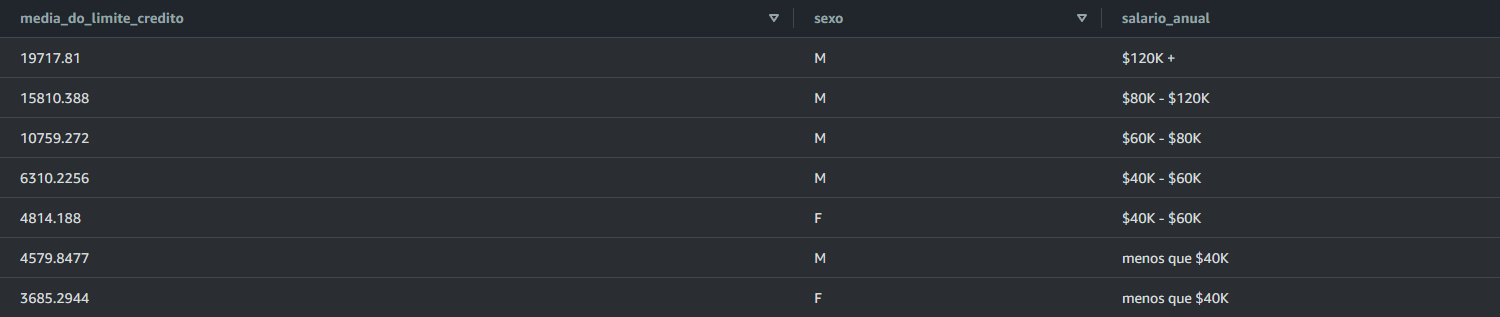

**Conclusão:** Podemos tirar algumas conclusões desse resultado acima, inicialmente os clientes do sexo feminino possúem o salário anual até no máximo 60 mil dólares, podemos notar também que o salário anual parece está bem relacionado com a média do limite do cartão, aplicando o cálculo de correlação de Perason entre esses dois atributos obtemos um r=0.59 ou seja uma correlação moderada, como o sinal é positivo indica que as variáveis se movem no mesmo sentido, ou seja quanto mais o cliente ganha anualmente, mas o limite tende a ser maior. Pode ser um bom indicativo para alguma campanha de marketing direcionada ou podem ser ótimos atributos para um modelo de Machine Learning para regressão. Vamos tentar explorar outros insights!

**Já que os homens ganham mais será que o valor que eles gastam é muito mais alto que das mulheres?**

```SQL
SELECT 
    AVG(valor_transacoes_12m) AS valor_medio_transacoes,
    MIN(valor_transacoes_12m) AS valor_minimo_transacoes,
    MAX(valor_transacoes_12m) AS valor_maximo_transacoes,
    sexo
FROM 
    credito
GROUP BY 
    sexo
```

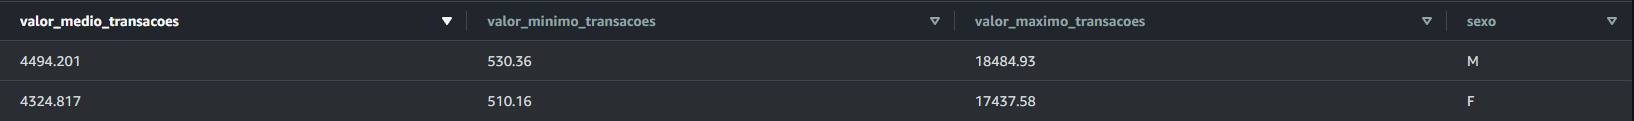

**Conclusão:** Não há muita relação entre o valor gasto dentre os sexos

**Entendemos que os clientes com o perfil masculino que ganham mais são os que possuem maior limite do cartão, vamos traçar o perfil desses clientes?**

```SQL
SELECT
    AVG(limite_credito) AS limite_credito,
    AVG(idade) AS media_idade,
    ROUND(AVG(dependentes), 0) AS media_dependentes,
    AVG(valor_transacoes_12m) AS media_valor_transacoes,
    salario_anual,
    estado_civil,
    sexo
FROM 
    credito
WHERE
    salario_anual != 'na' AND 
    estado_civil != 'na' AND 
    sexo = 'M'
GROUP BY 
    salario_anual,
    estado_civil
ORDER BY
    limite_credito DESC;
```

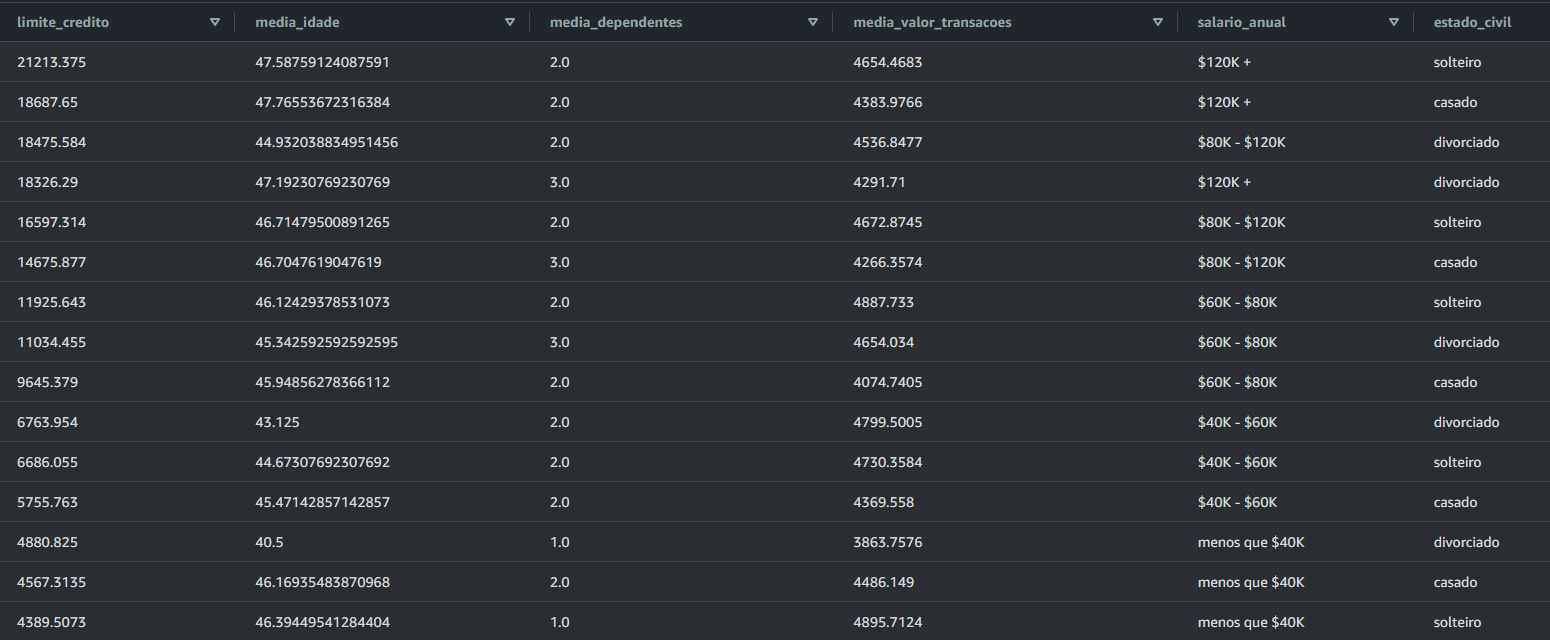

**Conclusão:** Podemos tirar de conclusão que esses homens possúem em comum a média de idade maior que 45 anos, possuem mais de 2 dependentes na família, o valor médio das transações é maior que 4 mil e o estado civíl parece não ter relação com o limite do crédito.

**Analisando as transações pelo sexo e pelo tipo do cartão**

```SQL
SELECT
    AVG(valor_transacoes_12m) AS media_valor_transacoes_12m,
    ROUND(AVG(qtd_transacoes_12m), 2) AS media_qtd_transacoes,
    ROUND(AVG(valor_transacoes_12m) / AVG(qtd_transacoes_12m), 2) AS valor_cada_transacao,
    sexo,
    tipo_cartao
FROM 
    credito
GROUP BY 
    sexo,
    tipo_cartao
ORDER BY
    media_valor_transacoes_12m DESC;
```

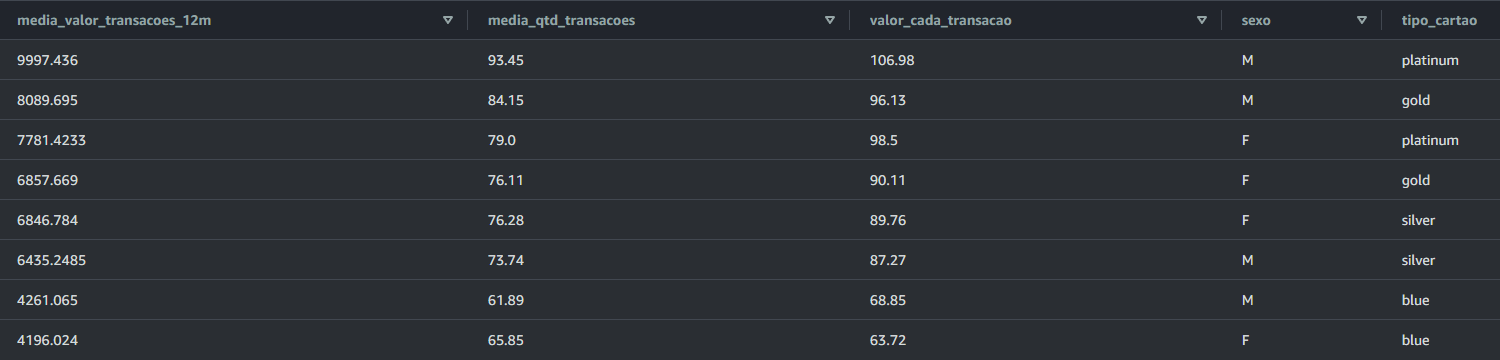

**Conclusão:** Podemos analisar que o valor médio das transações são bem balanceados entre as mulheres e homens, porém os homens ainda gastam mais. Os cartões do tipo platinum e gold permancem sendo os que possúem os maiores valores médios gastos, além das maiores quantidade de transações.

## 5\. Conclusão

Cocluindo nossa análise podemos tirar algumas conclusões, sendo elas:

- Não há clientes menores de idade em nosso dataset;
- A maioria dos clientes em nossa base possui ensino superior, sendo o mestrado nossa moda porém o doutorado é o menos frequente;
- Por mais que a quantidade de homen e mulheres seja proprocional, os homens ganham mais o que impacta no limite de crédito maior, porém o valor médio gasto é semelhante aos das mulheres;
- Os homens com maior limite de crédito possúem em comum a média de idade maior que 45 anos, possuem mais de 2 dependentes na família, o valor médio das transações é maior que 4 mil;
- Os homens possúem a maior média do valor das transações em 12 meses;
- O cartão platinum e gold possúem as maiores médias de transações e também as maiores quantidades de transações todas ocorridas em 12 meses.